In [1]:
import requests
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
# Specify the path to your .txt file
api_path = "../keys/api_key_youtube.txt"

api_key_number = 0

# Get api_key text
with open(api_path, 'r') as file:
    api_key = str(file.read()).split('\n')[api_key_number].split(':')[1].strip()

In [4]:
# Parámetros de la consulta inicial
queries = [
    'top smartphones',
    'smartphones gama media',
    'smartphones gaming',
    'unboxing smartphone',
    'smartphones con mejor camara'
]

params = {
    'part': 'snippet',
    'type': 'video',
    'maxResults': 50,
    'key': api_key,
    'order': 'relevance',
    'publishedAfter': '2022-01-01T00:00:00Z',
    'videoDuration': 'any',
    'regionCode': 'ES'
}

In [20]:
def fetch_search_videos(params, query):

    url = 'https://www.googleapis.com/youtube/v3/search'
    params['q'] = query

    response = requests.get(url, params=params)
    all_results = response.json()['items']
    page_info = response.json()['pageInfo']['totalResults']
    print(f'total video results: {page_info}')

    next_page_token = None

    while True:
        if next_page_token:
            params['pageToken'] = next_page_token

        response = requests.get(url, params=params)

        if response.status_code == 200:
            # Parsear la respuesta en formato JSON
            results = response.json()
            all_results.extend(results['items'])
            
            next_page_token = results.get('nextPageToken')
            
            # Si no hay más páginas, rompe el bucle
            if not next_page_token:
                break
        else:
            print(f"Error: {response.status_code}")
            break

    return(all_results)

In [5]:
# Get all results
result_1 = fetch_search_videos(params, queries[0])
result_2 = fetch_search_videos(params, queries[1])
result_3 = fetch_search_videos(params, queries[2])
result_4 = fetch_search_videos(params, queries[3])
result_5 = fetch_search_videos(params, queries[4])

# Join the results and flat the results
result_list = [result_1, result_2, result_3, result_4, result_5]
video_search_list = [item for sublist in result_list for item in sublist]
print(f'total videos: {len(video_search_list)}')

total video results: 1000000


In [376]:
def get_video_info(video, query):
    videos_info = {
        'title': video['snippet']['title'],
        'videoId': video['id']['videoId'],
        'channelTitle': video['snippet']['channelTitle'],
        'channelId': video['snippet']['channelId'],
        'description': video['snippet']['description'],
        'publishTime': video['snippet']['publishTime'],
        'query': query
    }
    return(videos_info)

In [377]:
all_video_1 = [get_video_info(result_1[n], queries[0]) for n in range(0, len(result_1))]
all_video_2 = [get_video_info(result_2[n], queries[1]) for n in range(0, len(result_2))]
all_video_3 = [get_video_info(result_3[n], queries[2]) for n in range(0, len(result_3))]
all_video_4 = [get_video_info(result_4[n], queries[3]) for n in range(0, len(result_4))]
all_video_5 = [get_video_info(result_5[n], queries[4]) for n in range(0, len(result_5))]

In [396]:
result_list_new = [all_video_1, all_video_2, all_video_3, all_video_4, all_video_5]
all_video_info = [item for sublist in result_list_new for item in sublist]

In [397]:
# Get and export the dataframe
df = pd.DataFrame(all_video_info)
df.to_csv('./smartphones_search_info.csv', index=False)
df.head()

In [399]:
df_search = pd.read_csv('./smartphones_search_info.csv')
len(df_search)

1919

In [71]:
# Function to fetch video metadata
def fetch_video_metadata(video_id, api_key):
    url = f"https://www.googleapis.com/youtube/v3/videos?part=snippet,statistics,contentDetails&id={video_id}&key={api_key}"
    response = requests.get(url).json()
    if 'items' in response and len(response['items']) > 0:
        return(response['items'])
    else:
        return None

In [74]:
video_info = [fetch_video_metadata(df['videoId'][n], api_key) for n in range(0, len(df['videoId']))]

In [226]:
def get_video_metadata(video_response):
    
    if video_response == None:
        return None
    
    video_metadata = video_response[0]

    if video_metadata and len(video_metadata) > 0:
        video_info = {
                    "videoId": video_metadata['id'],
                    "title": video_metadata['snippet']['title'],
                    "channelId": video_metadata['snippet']['channelId'],
                    "description": video_metadata['snippet']['description'],
                    "publishedAt": video_metadata['snippet']['publishedAt'],
                    "thumbnail_url": video_metadata['snippet']['thumbnails']['default']['url'],
                    "tags": video_metadata['snippet'].get('tags', []),
                    "live_broadcast": video_metadata['snippet']['liveBroadcastContent'],
                    "categoryId": video_metadata['snippet']['categoryId'],
                    "viewCount": video_metadata['statistics'].get('viewCount', 0),
                    "likeCount": video_metadata['statistics'].get('likeCount', 0),
                    "commentCount": video_metadata['statistics'].get('commentCount', 0),
                    "licensed": video_metadata['contentDetails']['licensedContent'],
                    "duration": video_metadata['contentDetails']['duration'],
                    "caption": video_metadata['contentDetails']['caption'],
                    }
        return(video_info)
    else:
        return None   

In [227]:
video_info[0][0]

{'kind': 'youtube#video',
 'etag': '68OPcXNPh7XS57Djm1nwLkA79qk',
 'id': 'sAeLgwkQZxE',
 'snippet': {'publishedAt': '2023-03-05T09:51:33Z',
  'channelId': 'UCl-LwKb3m8uJ3TXqAfeVHnw',
  'title': '3 Amazing and unique smartphone in 2023 😱 | Smartphones Technology',
  'description': "#unihertzlina #oneplus11concept #motrolarizr #smartphone #nothingphone1 #rollabledisplay #liquidCoolingsystemsmartphone #smartphonetechnology\n\n1. Introducing Luna, the sleek and stylish smartphone from Unihertz\n\nSmartphones, mobile tech, Android, mobile photography, mobile, iPhone, phones, android reviews, phone reviews, tech reviews, tech, smartphone reviews, unihertz tank, nothing phone 1, unihertz titan slim review, unihertz luna, unihertz luna phone, unihertz luna phone in india, unihertz luna india price, unihertz luna price, unihertz luna vs nothing phone 1, unihertz luna vs nothing, unihertz luna mwc, unihertz luna mwc 2023, mwc 2023, unihertz luna unboxing, unihertz luna first impressions, unihert

In [228]:
video_metadata_df = [get_video_metadata(video_info[n]) for n in range(0, len(video_info))]
len(video_metadata_df)

1919

In [229]:
video_metadata_df = list(filter(lambda x: x is not None, video_metadata_df))
len(video_metadata_df)

1791

In [230]:
video_metadata_df = pd.DataFrame(video_metadata_df)
video_metadata_df.to_csv('./video_data.csv')

In [288]:
video_metadata_df.head(20)

,videoId,title,channelId,description,publishedAt,thumbnail_url,tags,live_broadcast,categoryId,viewCount,likeCount,commentCount,licensed,duration,caption
0,sAeLgwkQZxE,3 Amazing and unique smartphone in 2023 😱 | Sm...,UCl-LwKb3m8uJ3TXqAfeVHnw,#unihertzlina #oneplus11concept #motrolarizr #...,2023-03-05T09:51:33Z,https://i.ytimg.com/vi/sAeLgwkQZxE/default.jpg,"[smartphone, unihertz luna smartphone, oneplus...",none,28,15049804,863203,2073,False,PT59S,false
1,AaxPLnvCy08,7 Smartphones you won't believe are Real.,UCMiJRAwDNSNzuYeN2uWa0pA,That Tetris Smartphone though...💀 Get Surfshar...,2022-06-22T12:34:24Z,https://i.ytimg.com/vi/AaxPLnvCy08/default.jpg,"[iphone, smartphone, future phone, future smar...",none,28,8901895,229734,5923,True,PT10M18S,false
2,_c1RvIU6WAE,The BEST Smartphones for 2024!,UCMiJRAwDNSNzuYeN2uWa0pA,Giving out my awards to the Best Smartphones o...,2023-11-30T12:19:16Z,https://i.ytimg.com/vi/_c1RvIU6WAE/default.jpg,"[tech, phones, smartphones, best, top, awards,...",none,28,6141531,211748,9790,True,PT19M49S,false
3,JkRXhe3KaPE,Smartphone Awards 2023!,UCBJycsmduvYEL83R_U4JriQ,The best smartphones of 2023!\n\nMKBHD Merch: ...,2023-12-19T21:58:50Z,https://i.ytimg.com/vi/JkRXhe3KaPE/default.jpg,"[smartphone awards, the smartphone awards, bes...",none,28,5851776,220141,12676,True,PT26M23S,true
4,fjRaA-8CV4A,The Best Smartphones for 2023!,UCMiJRAwDNSNzuYeN2uWa0pA,Giving out my awards to the Best Smartphones o...,2022-12-02T11:54:18Z,https://i.ytimg.com/vi/fjRaA-8CV4A/default.jpg,"[best phone, best smartphone, phone, mobile ph...",none,28,5804030,211171,7700,True,PT12M38S,false
5,5NjFuS_24v8,Smartphone Awards 2022!,UCBJycsmduvYEL83R_U4JriQ,The Best Smartphones of 2022!\n\nMKBHD Merch: ...,2022-12-27T22:00:10Z,https://i.ytimg.com/vi/5NjFuS_24v8/default.jpg,"[Smartphone Awards, smartphone awards, best ph...",none,28,5402200,215066,10844,True,PT20M11S,true
6,oCbQvFI_Brk,Do Not Buy SmartPhones in MidRange Right Now!,UCdp6GUwjKscp5ST4M4WgIpw,This video is made in #collab with Poco India....,2023-04-28T06:44:23Z,https://i.ytimg.com/vi/oCbQvFI_Brk/default.jpg,[TechWiser],none,28,5376779,255991,1583,True,PT1M,false
7,pYZF_MNYtEk,World's Best Camera Smartphone 🤯🤯🤯 #shorts #sm...,UCZplcq7yAkOmNHcw44zCWvw,World's Best Camera Smartphone 🤯🤯🤯 #shorts #sm...,2023-04-20T18:28:38Z,https://i.ytimg.com/vi/pYZF_MNYtEk/default.jpg,"[Tech Padd, best camera smartphone, best smart...",none,28,4188695,111769,399,True,PT24S,false
8,NMHwoZH0V3M,"5 Best Smartphones Under ₹20,000 !",UCXUJJNoP1QupwsYIWFXmsZg,Smartphones kharid liye jaye doston\n\n🔥 Subsc...,2023-03-27T14:45:27Z,https://i.ytimg.com/vi/NMHwoZH0V3M/default.jpg,"[best phone under 20000, best smartphone under...",none,28,3961863,139081,4116,True,PT8M36S,false
9,ZPFZUDLfnDQ,Top 5 Best 5G Smartphones Under ₹15000 Budget⚡...,UCEPL07qzVsOcHd3sMUws65g,"Friends, Welcome To Another Helpful Video- Her...",2022-09-03T07:03:46Z,https://i.ytimg.com/vi/ZPFZUDLfnDQ/default.jpg,"[TrakinTech, Trakin Tech, top 5 best phones un...",none,28,3834617,114478,2658,True,PT6M16S,false


In [21]:
# Convert video data to DataFrame
df_video = video_metadata_df.copy()
df_video['likeCount'] = df_video['likeCount'].astype(int)
df_video['commentCount'] = df_video['commentCount'].astype(int)
df_video['publishedAt'] = pd.to_datetime(df_video['publishedAt'])
df_video['publishedYear'] = df_video['publishedAt'].dt.to_period('Y')
value_counts = df_video['channelId'].sort_values(ascending=False).value_counts().plot()

NameError: name 'video_metadata_df' is not defined

# Get video transcription

In [318]:
from youtube_transcript_api import YouTubeTranscriptApi
from youtube_transcript_api.formatters import TextFormatter

def get_transcription(video_id):
    try:
        # Obtener la lista de transcripciones disponibles para el video
        transcript_list = YouTubeTranscriptApi.list_transcripts(video_id)
        
        # Intentar encontrar una transcripción generada
        try:
            transcript = transcript_list.find_generated_transcript(['en'])  # Cambiar 'en' por otros idiomas generados si es necesario
            print("Transcripción generada encontrada.")
        except:
            print("No se encontró ninguna transcripción generada.")
            return None
        
        # Intentar traducir al español
        try:
            translated_transcript = transcript.translate('en')
            print("Transcripción traducida al ingles.")
        except:
            # Si no se puede traducir al español, traducir al inglés
            print("No se pudo traducir al ingles.")
        
        # Formatear la transcripción a texto plano
        text_formatter = TextFormatter()
        text_formatted = text_formatter.format_transcript(translated_transcript.fetch())
        
        return text_formatted
    
    except Exception as e:
        print(f"Error obteniendo o traduciendo la transcripción: {e}")
        return None

In [321]:
transcript_test = get_transcription(df_video['videoId'][3])

Transcripción generada encontrada.
Transcripción traducida al ingles.
Error obteniendo o traduciendo la transcripción: 
Could not retrieve a transcript for the video https://www.youtube.com/watch?v=429 Client Error: Too Many Requests for url: https://www.youtube.com/api/timedtext?v=JkRXhe3KaPE&ei=uozAZujqGoWLp-oP0OelyAM&caps=asr&opi=112496729&exp=xbt&xoaf=5&hl=en&ip=0.0.0.0&ipbits=0&expire=1723920170&sparams=ip,ipbits,expire,v,ei,caps,opi,exp,xoaf&signature=362E92B2A9E26AD378DBDB64DC9F2B049393A7D5.AE7EA604D37526334F801327AA0204EAB255DDD3&key=yt8&kind=asr&lang=en&tlang=en! This is most likely caused by:

Request to YouTube failed: JkRXhe3KaPE

If you are sure that the described cause is not responsible for this error and that a transcript should be retrievable, please create an issue at https://github.com/jdepoix/youtube-transcript-api/issues. Please add which version of youtube_transcript_api you are using and provide the information needed to replicate the error. Also make sure that t

In [320]:
transcript_test

In [323]:
video_list = video_metadata_df['videoId']
video_list

0       sAeLgwkQZxE
1       AaxPLnvCy08
2       _c1RvIU6WAE
3       JkRXhe3KaPE
4       fjRaA-8CV4A
5       5NjFuS_24v8
6       oCbQvFI_Brk
7       pYZF_MNYtEk
8       NMHwoZH0V3M
9       ZPFZUDLfnDQ
10      8aHlhRBdVhY
11      m_rTb2m2LKQ
12      L-gu52eVHhk
13      JXetlthTfDY
14      SwVWqIt-Ygk
15      gKHEsPZ4axE
16      5_Oc0FH2ukE
17      K8mlKtp3OB8
18      e-xZzMJmR6E
19      uKQ7qcF4-W8
20      zhhXK2ANvNE
21      biPkffAmqe8
22      wzN3xG-Wkpk
23      cvKE8qn15E4
24      GuDmwUTyvuE
25      wowKLXRIJ90
26      IX82AshpgkM
27      hzs4iAkNtWU
28      sFAoQVT5Ne4
29      3K_EUecWZn4
30      HUWpwH_Yn4I
31      -y2Anri8tTA
32      IESXeIhVkVU
33      3McKVkMMfbU
34      0T1x7c_-z0A
35      2Cn7lQ_zAgk
36      ZIjcAZ5tdHk
37      8j9jD58X774
38      skO3U2sAOTU
39      Ui8ZJaYpwlY
40      FaaFwl6A-w8
41      O2I26SoT9Rc
42      vbhzTB3BQZk
43      vwvELcyiiYY
44      g-f8I_BMrh4
45      -0639ve3Wr0
46      ybakwHQ6ZZ4
47      nIUC0vEnqc0
48      66GvVvQ8Oho
49      SvUHeoFtSKw


In [314]:
# Get all transcriptions
video_transcript_list = []
for id in video_list:
    transcript = {
        'video_id': id,
        'transcript': get_transcription(id)
    }
    video_transcript_list.append(transcript)

No se encontró ninguna transcripción generada.
Transcripción generada encontrada.
Transcripción traducida al ingles.
Transcripción generada encontrada.
Transcripción traducida al ingles.
Transcripción generada encontrada.
Transcripción traducida al ingles.
Transcripción generada encontrada.
Transcripción traducida al ingles.
Transcripción generada encontrada.
Transcripción traducida al ingles.
Transcripción generada encontrada.
Transcripción traducida al ingles.
No se encontró ninguna transcripción generada.
No se encontró ninguna transcripción generada.
No se encontró ninguna transcripción generada.
No se encontró ninguna transcripción generada.
No se encontró ninguna transcripción generada.
No se encontró ninguna transcripción generada.
Transcripción generada encontrada.
Transcripción traducida al ingles.
No se encontró ninguna transcripción generada.
No se encontró ninguna transcripción generada.
No se encontró ninguna transcripción generada.
No se encontró ninguna transcripción gen

KeyboardInterrupt: 

In [338]:
df_transcript = pd.DataFrame(video_transcript_list)
df_transcript.head()

,video_id,transcript
0,sAeLgwkQZxE,None
1,AaxPLnvCy08,ten years ago samsung released a trailer of a...
2,_c1RvIU6WAE,the smartphone market in 2023 has definitely ...
3,JkRXhe3KaPE,[Music] all right welcome to the smartphone ...
4,fjRaA-8CV4A,this year has finally shaken up the smartphon...


<AxesSubplot:xlabel='original_language'>

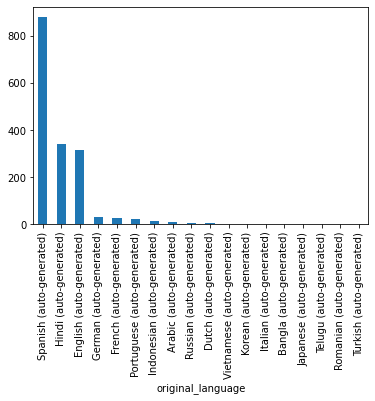

In [345]:
df_transcript = pd.read_csv('./df_transcript_original.csv',)
df_transcript['original_language'].value_counts().plot(kind='bar')

In [348]:
df_video['commentCount'] = df_video['commentCount'].astype(int)
df_video['commentCount'][0]

2073

# Get channel comments

In [439]:
dfc1 = pd.read_csv('./video_comments/df_video_comments_[0_300].csv')
dfc2 = pd.read_csv('./video_comments/df_video_comments_[300_1000].csv')
dfc3 = pd.read_csv('./video_comments/df_video_comments_[_1000].csv')

# Concatenate the three datasets into one
dfc = pd.concat([dfc1, dfc2, dfc3], ignore_index=True)
dfc.to_csv('df_comments_video.csv', index=False)

/tmp/ipykernel_327/1931959164.py:1: DtypeWarning: Columns (5,8,10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  dfc1 = pd.read_csv('./video_comments/df_video_comments_[0_300].csv')


In [432]:
dfc['video_id'].value_counts()

video_id
otcZMrWQKSE    2272
9_JzT-5v0uE    2084
TrkVeS_nukk    2076
EpywlNNKz0s    2048
6e8e3q_Kvg4    2010
-b9fjl-2-ys    1994
WZDrm5j_xCc    1892
vwQxLBoAmMc    1844
fgvRUBd17Hc    1528
JkRXhe3KaPE    1272
5NjFuS_24v8    1259
_c1RvIU6WAE    1227
fjRaA-8CV4A    1184
r73Dj9iIQHY    1174
skO3U2sAOTU    1126
Fp4hG8invdw    1110
TYu3H8Kg3ls    1104
AaxPLnvCy08    1096
66GvVvQ8Oho    1093
HUWpwH_Yn4I    1087
L-gu52eVHhk    1064
m_rTb2m2LKQ    1059
NMHwoZH0V3M    1053
GuDmwUTyvuE    1052
BWcapAarMrM    1052
uKQ7qcF4-W8    1047
hzs4iAkNtWU    1043
e-xZzMJmR6E    1043
K8mlKtp3OB8    1041
JXetlthTfDY    1041
8aHlhRBdVhY    1041
ZPFZUDLfnDQ    1040
gKHEsPZ4axE    1038
n4VGZVf-phc    1037
wowKLXRIJ90    1034
5_Oc0FH2ukE    1032
SwVWqIt-Ygk    1032
IX82AshpgkM    1031
kmAQcqoHZkc    1030
O2I26SoT9Rc    1028
biPkffAmqe8    1027
9QvxANs1e_A    1024
mdEV7g4aweM    1024
ll_lzqma1t4    1018
8j9jD58X774    1017
zhhXK2ANvNE    1016
2Cn7lQ_zAgk    1014
-y2Anri8tTA    1013
cvKE8qn15E4    1012
vwvELcyiiYY

In [437]:
df_video[df_video['videoId'] == 'vN05xpGRXY4']

,videoId,title,channelId,description,publishedAt,thumbnail_url,tags,live_broadcast,categoryId,viewCount,likeCount,commentCount,licensed,duration,caption,publishedYear
1677,vN05xpGRXY4,5 #Smartphones con pantalla curva más populare...,UCvFBKx2qjdSQDBJZsgH6P4w,¿Te imaginas chatear con Elon Musk o Rick de R...,2022-03-18 00:20:06+00:00,https://i.ytimg.com/vi/vN05xpGRXY4/default.jpg,"[Pantalla curva, celulares con pantalla curva,...",none,26,9452,67,3,True,PT2M31S,false,2022


In [422]:
duplicates = df_video[df_video.duplicated(subset='videoId', keep=False)]

df_video = df_video.drop_duplicates(subset='videoId', keep='first')
# len(df)

df_video['commentCount'] = df_video['commentCount'].astype(int)
df_video['commentCount'][:500].sum()

234805

In [194]:
"""

# Function to get video comments with pagination
def get_video_comments(api_key, video_id):
    comments = []
    url = f"https://www.googleapis.com/youtube/v3/commentThreads?part=snippet&videoId={video_id}&key={api_key}"
    
    while url:
        response = requests.get(url).json()
        if 'items' not in response:
            print("Error getting video comments")
            break
        
        for item in response['items']:
            comment = item['snippet']['topLevelComment']['snippet']
            comment_data = {
                'comment_id': item['id'],
                'kind': response['kind'],
                'author': comment['authorDisplayName'],
                'author_channel_id': comment['authorChannelId']['value'],
                'text': comment['textDisplay'],
                'like_count': comment['likeCount'],
                'published_at': comment['publishedAt'],
                'updated_at': comment['updatedAt'],
                'canRate': comment['canRate'],
                'viewerRating': comment['viewerRating'],
                'canReply': item['snippet']['canReply'],
                'totalReplyCount': item['snippet']['totalReplyCount'],
                'isPublic': item['snippet']['isPublic'],
                'video_id': item['snippet']['videoId']
            }
            comments.append(comment_data)

        url = response.get('nextPageToken')
        if url:
            url = f"https://www.googleapis.com/youtube/v3/commentThreads?part=snippet&videoId={video_id}&key={api_key}&pageToken={url}"
        else:
            break

    return comments

# Get all video comments
# comments = get_video_comments(api_key, video_id)

# Get comments from multiple videos
comments_list = [get_video_comments(api_key, videos_id_list[n]) for n in range (0, len(videos_id_list))]

# Flattening the nested list structure
flattened_data = [item for sublist in comments_list for item in sublist]

# Creating the dataframe
df_comments = pd.DataFrame(flattened_data)

"""

'\n\n# Function to get video comments with pagination\ndef get_video_comments(api_key, video_id):\n    comments = []\n    url = f"https://www.googleapis.com/youtube/v3/commentThreads?part=snippet&videoId={video_id}&key={api_key}"\n    \n    while url:\n        response = requests.get(url).json()\n        if \'items\' not in response:\n            print("Error getting video comments")\n            break\n        \n        for item in response[\'items\']:\n            comment = item[\'snippet\'][\'topLevelComment\'][\'snippet\']\n            comment_data = {\n                \'comment_id\': item[\'id\'],\n                \'kind\': response[\'kind\'],\n                \'author\': comment[\'authorDisplayName\'],\n                \'author_channel_id\': comment[\'authorChannelId\'][\'value\'],\n                \'text\': comment[\'textDisplay\'],\n                \'like_count\': comment[\'likeCount\'],\n                \'published_at\': comment[\'publishedAt\'],\n                \'updated_at\

NameError: name 'df_comments' is not defined

172890